In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

In [2]:
# Here I generate fake data following a lognormal distribution
fake_data = np.random.lognormal(0, 1, 1000)

(0, 10)

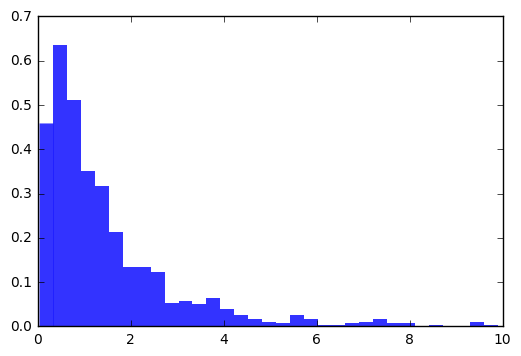

In [3]:
# Visualize the fake data
fig, ax = plt.subplots()
ax.hist(fake_data, bins=100, normed=True, alpha=0.8, edgecolor="none")
ax.set_xlim(0, 10)

In [4]:
# Fit to a lognormal distribution

x = np.linspace(0, 10, 1000)
params = stats.lognorm.fit(fake_data)
print("Fitted parameters are {}".format(params))

# Generate fitted curve with the PDF
pdf_fitted = stats.lognorm.pdf(x, *params)

Fitted parameters are (0.96567490552840951, -0.0079310132392659445, 0.99471705192421966)


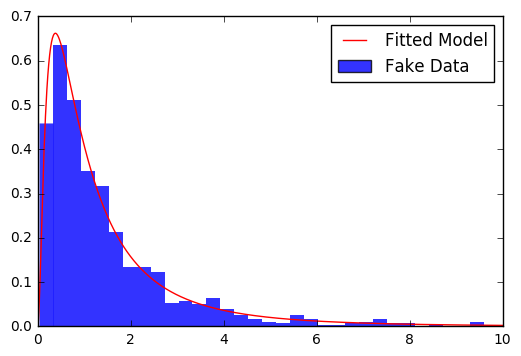

In [5]:
# Visualize together the fake data and the fitted curve

fig, ax = plt.subplots()

ax.hist(fake_data, bins=100, normed=True, alpha=0.8, edgecolor="none", label="Fake Data")
ax.plot(x, pdf_fitted, color='red', label="Fitted Model")

ax.set_xlim(0, 10)
ax.legend()

In [6]:
# Now find the cutoff value associated with a given probability
# This `ppf` function is the inverse of `cdf` which gives the area under
# the dsitribution density curve to the left of a certain value on the x axis.

cutoff = stats.lognorm.ppf(0.9, *params)

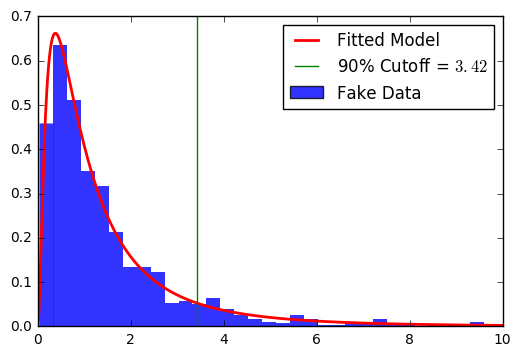

In [7]:
# Visualize everything

fig, ax = plt.subplots()

ax.hist(fake_data, bins=100, normed=True, alpha=0.8, edgecolor="none", label="Fake Data")
ax.plot(x, pdf_fitted, color='red', label="Fitted Model", lw=2)
ax.axvline(x=cutoff, color='green', label="90% Cutoff = ${:.2f}$".format(cutoff))

ax.set_xlim(0, 10)
ax.legend()